## 梯度下降算法估计参数

In [24]:
# Importing the basic libraries. 导入相关库
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Create dataset

In [25]:
# Create dataset

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

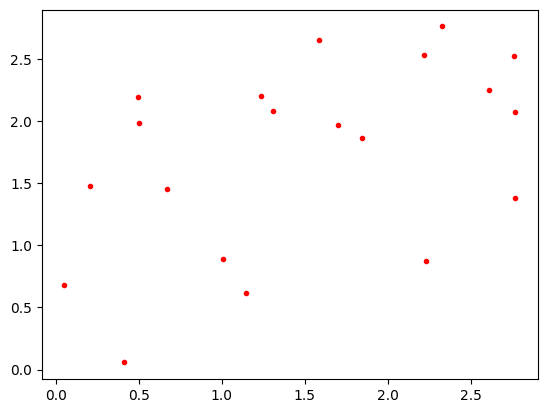

In [26]:
plt.plot(X, y, "r.")

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X, y)

Ridge(alpha=10)

In [28]:
ridge_reg.intercept_, ridge_reg.coef_

(array([1.36431615]), array([[0.24308249]]))

## 批量梯度下降

In [29]:
import numpy as np

class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def get_w(self):
        print(self.coef_, self.intercept_)
        
    def fit(self,X_train,y_train):
        # init your coefficients from X_train because coefficients are equal to the number of features
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1]) # [1] take the columns from (353, 10) <-- shape of X_train
        
        for i in range(self.epochs):
            # update all the coefficients and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


In [30]:
gd = GDRegressor()
y = y.reshape(-1)
print(X.shape, y.shape)
gd.fit(X_train = X, y_train = y)
gd.get_w()

(20, 1) (20,)
0.39051472547771754 [0.79052214]
[0.79052214] 0.39051472547771754


## 随机梯度下降

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y)

SGDRegressor()

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.59241985]), array([0.6775472]))

## 小批量梯度下降

In [48]:
def MBGD(X, y):
    
    ept=0.001 #精度
    loss=1 #定义一个损失 方便进入循环体 后来表示两次迭代损失函数的差异
    alpha=0.01 #学习率
    max_iter=0 #梯度更新次数
    numsSample = X.shape[0]#样本数量
    theta=np.random.randn(X.shape[1], 2) #初始化theta
    # print(theta)

    while max_iter<100 and loss>ept:
 
        #这里的小批量梯度下降每次选取两个样本
        i = np.random.randint(0, numsSample-1)  # 随机抽取一个样本
        # j=(i+1)%numsSample #选取另一个样本
 
        partial=(1/2)*X[i:i+2,:].T.dot(X[i:i+2,:].dot(theta)-y[i:i+2,:]) #损失函数关于theta的偏导数
    
        theta=theta-alpha*partial
 
        max_iter+=1
        loss=(1/(2*X.shape[0]))*np.sum((X.dot(theta)-y)**2) #计算两次迭代之间的差异(损失函数) 无明显差异就说明算法收敛到了全局最优解
    return max_iter,theta
 

print(type(y))
y = y.reshape(-1, 1)
print(y.shape)
max_iter,theta1 = MBGD(X, y)
print(theta1)
 

<class 'numpy.ndarray'>
(20, 1)
[[0.89521201 0.969518  ]]


## Plot

In [34]:
X_1 = np.linspace(0, 3, 100).reshape(100,1)
y_new1 = ridge_reg.predict(X_1)
y_new2 = gd.predict(X_1)

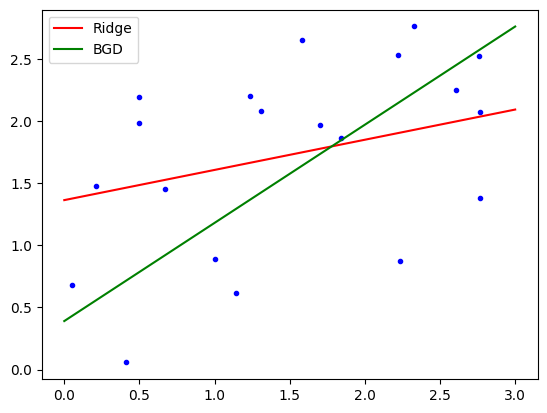

In [53]:
plt.plot(X, y, "b.")
plt.plot(X_1, y_new1, "r-", label="Ridge")
plt.plot(X_1, y_new2, "g-", label="BGD")
plt.legend()
plt.savefig('./Image/BGD.png', dpi=200)

In [36]:
y_new3 = sgd_reg.predict(X_1)

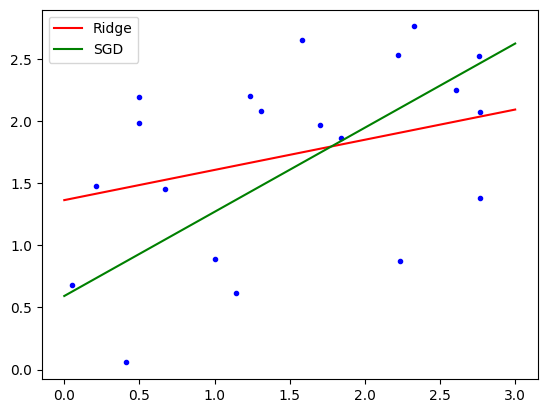

In [54]:
plt.plot(X, y, "b.")
plt.plot(X_1, y_new1, "r-", label="Ridge")
plt.plot(X_1, y_new3, "g-", label="SGD")
plt.legend()
plt.savefig('./Image/SGD.png', dpi=200)

In [51]:
k = theta1[0, 0]
b = np.ones(shape=(100, 1))
b *= theta1[0, 1]
y_new4 = k * X_1 + b

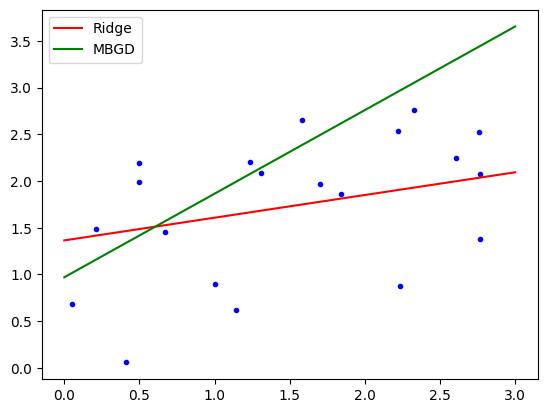

In [55]:
plt.plot(X, y, "b.")
plt.plot(X_1, y_new1, "r-", label="Ridge")
plt.plot(X_1, y_new4, "g-", label="MBGD")
plt.legend()
plt.savefig('./Image/MBGD.png', dpi=200)